In [4]:
dataset = "/content/drive/MyDrive/ML LAB DATASETs/KNNAlgorithmDataset.csv"

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



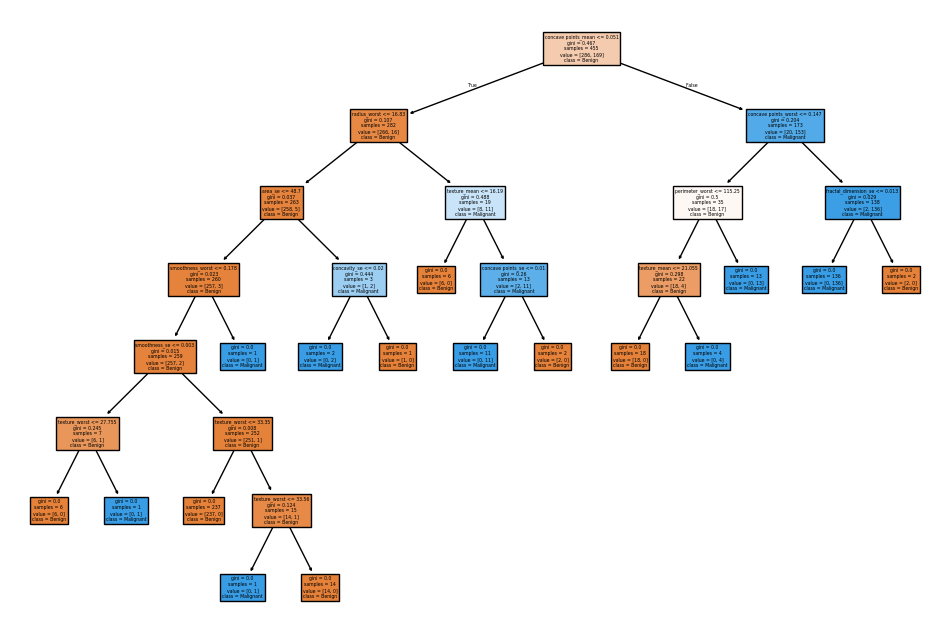

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv(dataset)

# Drop irrelevant columns
df.drop(columns=["id", "Unnamed: 32"], inplace=True)

# Convert Diagnosis ('M' -> 1, 'B' -> 0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Separate features and target
X = df.drop(columns=["diagnosis"])  # Features
y = df["diagnosis"]                 # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train, y_train)

# Print Classification Report
y_pred = dt.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["Benign", "Malignant"])
plt.show()


Depth 1: Train Accuracy = 0.9209, Test Accuracy = 0.8947
Depth 2: Train Accuracy = 0.9297, Test Accuracy = 0.9298
Depth 3: Train Accuracy = 0.9780, Test Accuracy = 0.9474
Depth 4: Train Accuracy = 0.9956, Test Accuracy = 0.9474
Depth 5: Train Accuracy = 0.9956, Test Accuracy = 0.9474
Depth 6: Train Accuracy = 0.9978, Test Accuracy = 0.9386
Depth 7: Train Accuracy = 1.0000, Test Accuracy = 0.9474
Depth 8: Train Accuracy = 1.0000, Test Accuracy = 0.9474
Depth 9: Train Accuracy = 1.0000, Test Accuracy = 0.9474
Depth 10: Train Accuracy = 1.0000, Test Accuracy = 0.9474


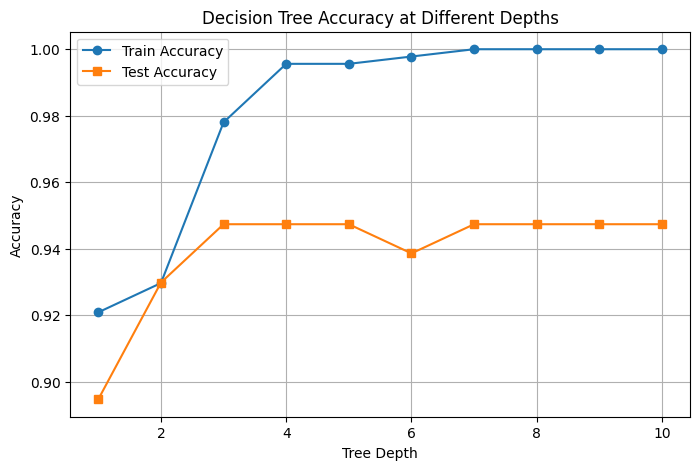

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv(dataset)

# Drop irrelevant columns
df.drop(columns=["id", "Unnamed: 32"], inplace=True)

# Convert Diagnosis ('M' -> 1, 'B' -> 0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Separate features and target
X = df.drop(columns=["diagnosis"])  # Features
y = df["diagnosis"]                 # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Track accuracy at different depths
depths = range(1, 11)  # Testing tree depths from 1 to 10
train_accuracies = []
test_accuracies = []

for depth in depths:
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    # Predict on training and test data
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)

    # Compute accuracies
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Depth {depth}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

# Plot Accuracy vs. Tree Depth
plt.figure(figsize=(8, 5))
plt.plot(depths, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(depths, test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy at Different Depths")
plt.legend()
plt.grid(True)
plt.show()



=== Classification Report for Depth 1 ===
Train Accuracy: 0.9209 | Test Accuracy: 0.8947

Test Data Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        71
           1       0.83      0.91      0.87        43

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114


=== Classification Report for Depth 2 ===
Train Accuracy: 0.9297 | Test Accuracy: 0.9298

Test Data Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        71
           1       0.95      0.86      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


=== Classification Report for Depth 3 ===
Train Accuracy: 0.9780 | Test Accuracy: 0.9474

Test Data Report:
               pr

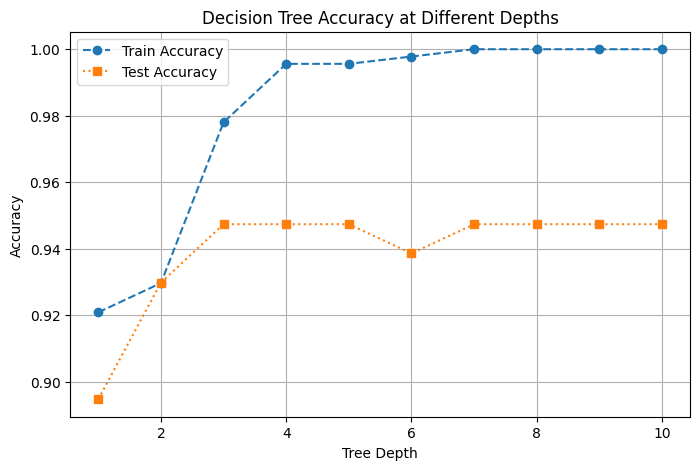

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv(dataset)

# Drop irrelevant columns
df.drop(columns=["id", "Unnamed: 32"], inplace=True)

# Convert Diagnosis ('M' -> 1, 'B' -> 0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Separate features and target
X = df.drop(columns=["diagnosis"])  # Features
y = df["diagnosis"]                 # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Track accuracy and classification report at different depths
depths = range(1, 11)  # Testing tree depths from 1 to 10
train_accuracies = []
test_accuracies = []

for depth in depths:
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    # Predictions on training and test data
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    # Compute accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"\n=== Classification Report for Depth {depth} ===")
    print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}\n")
    print("Test Data Report:\n", classification_report(y_test, y_test_pred))

# Plot Accuracy vs. Tree Depth
plt.figure(figsize=(8, 5))
plt.plot(depths, train_accuracies, label="Train Accuracy", marker='o', linestyle='dashed')
plt.plot(depths, test_accuracies, label="Test Accuracy", marker='s', linestyle='dotted')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy at Different Depths")
plt.legend()
plt.grid(True)
plt.show()
